In [1]:
import pandas as pd
import numpy as np
from alepython import ale_plot

In [2]:
#loading data
total_data = pd.read_csv('hotel_bookings_ohe.csv')
train_index = pd.read_csv('train_index.csv')

In [3]:
#select train data from training index
train = total_data.iloc[train_index.Train_Index,:]
train.reset_index(inplace=True)
train.head()

,index,arrival_date_year,adults,children,babies,previous_cancellations,booking_changes,total_of_special_requests,log_lead_time,total_nights,...,market_segment_Online TA,market_segment_Undefined,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,required_car_parking_0,required_car_parking_1,is_canceled
0,35564,2017,2,0,0,0,0,1,4.663439,2,...,1,0,0,0,1,0,0,1,0,0
1,24402,2016,1,0,0,0,0,0,0.000000,1,...,0,0,1,0,0,0,0,1,0,0
2,117756,2017,2,1,1,0,1,1,5.135798,7,...,1,0,1,0,0,0,0,1,0,0
3,5653,2016,2,0,0,0,0,0,3.044522,2,...,0,0,1,0,0,0,0,1,0,1
4,105241,2017,1,0,0,0,0,0,0.693147,1,...,0,0,1,0,0,0,0,1,0,0


In [4]:
#select test data
test = total_data.iloc[total_data.index.difference(train_index.Train_Index),:]
test.reset_index(inplace=True)
test.head()

,index,arrival_date_year,adults,children,babies,previous_cancellations,booking_changes,total_of_special_requests,log_lead_time,total_nights,...,market_segment_Online TA,market_segment_Undefined,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,required_car_parking_0,required_car_parking_1,is_canceled
0,2,2015,1,0,0,0,0,0,2.079442,1,...,0,0,1,0,0,0,0,1,0,0
1,3,2015,1,0,0,0,0,0,2.639057,1,...,0,0,1,0,0,0,0,1,0,0
2,8,2015,2,0,0,0,0,1,4.454347,3,...,1,0,1,0,0,0,0,1,0,1
3,9,2015,2,0,0,0,0,0,4.330733,3,...,0,0,0,0,1,0,0,1,0,1
4,10,2015,2,0,0,0,0,0,3.178054,4,...,1,0,1,0,0,0,0,1,0,1


In [5]:
#select train x, train y, test x, test y
train_x = train.drop(['index','is_canceled'],axis=1)
train_y = train['is_canceled']

test_x = test.drop(['index','is_canceled'],axis=1)
test_y = test['is_canceled']

In [6]:
#for visualization purpose
ale_df = pd.DataFrame(train_x)
ale_df.columns  = train.drop(columns = ["index","is_canceled"]).columns
ale_df.head()

,arrival_date_year,adults,children,babies,previous_cancellations,booking_changes,total_of_special_requests,log_lead_time,total_nights,previous_bookings,...,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,required_car_parking_0,required_car_parking_1
0,2017,2,0,0,0,0,1,4.663439,2,0,...,0,1,0,0,0,1,0,0,1,0
1,2016,1,0,0,0,0,0,0.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
2,2017,2,1,1,0,1,1,5.135798,7,0,...,0,1,0,1,0,0,0,0,1,0
3,2016,2,0,0,0,0,0,3.044522,2,0,...,0,0,0,1,0,0,0,0,1,0
4,2017,1,0,0,0,0,0,0.693147,1,0,...,0,0,0,1,0,0,0,0,1,0


# XGBoost Classifier

In [7]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Define the hyperparameters to be tuned
parameters = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}


# Create a GridSearchCV object
xgb_grid = GridSearchCV(xgb_model, parameters, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
xgb_grid.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [8]:
#the best model in Naive Bayes Classifiers
print('Best hyperparameters:', xgb_grid.best_params_)
print('Best cross-validation AUC score:', xgb_grid.best_score_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best cross-validation AUC score: 0.8704965926165006


In [9]:
#retrain the model by using all data
import time
train_time = time.time()

#retrain the model by using all data
xgboost_retrain = xgb.XGBClassifier(learning_rate =  0.1, max_depth =  7, n_estimators = 200)
xgboost_retrain.fit(train_x, train_y)

train_time = time.time() - train_time
print('XBGoost Running time: ',train_time )

XBGoost Running time:  5.993476152420044


In [10]:
y_pred = xgboost_retrain.predict(test_x)

# Performance Evaluation

In [11]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
import seaborn as sns 
cm = confusion_matrix(test_y, y_pred)
cm

array([[13859,  1190],
       [ 1820,  7008]])

In [12]:
#classification metrices in test set [f1-score]
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     15049
           1       0.85      0.79      0.82      8828

    accuracy                           0.87     23877
   macro avg       0.87      0.86      0.86     23877
weighted avg       0.87      0.87      0.87     23877



In [13]:
# Compute the misclassification rate
cm = confusion_matrix(test_y, y_pred)

misclass_rate = (cm[0,1] + cm[1,0]) / sum(sum(cm))

print("Misclassification rate in test dataset: ", misclass_rate)

Misclassification rate in test dataset:  0.12606273819994138


In [14]:
#AUC performance in test set
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(test_y, y_pred)
print('ROC AUC in test dataset : {:.4f}'.format(ROC_AUC))


ROC AUC in test dataset : 0.8574


## Interpretation for Decision Tree

/tmp/ipykernel_755268/3551611438.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.barh(importances['feature'][-20:], importances['importance'][-20:])


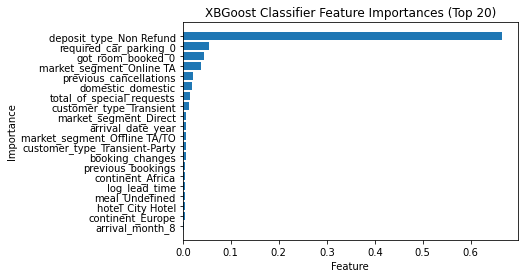

In [15]:
import matplotlib.pyplot as plt


# create a dataframe with feature importances
importances = pd.DataFrame({'feature': train_x.columns,
                            'importance': xgboost_retrain.feature_importances_})

# sort the dataframe by feature importance in descending order
importances = importances.sort_values(by='importance', ascending=True)


# plot top 20 feature importances
plt.barh(importances['feature'][-20:], importances['importance'][-20:])
#plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XBGoost Classifier Feature Importances (Top 20)')
plt.show()

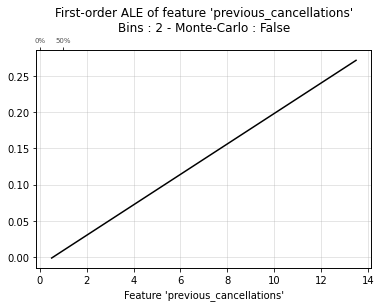

<AxesSubplot: title={'center': "First-order ALE of feature 'previous_cancellations'\nBins : 2 - Monte-Carlo : False"}, xlabel="Feature 'previous_cancellations'">

In [21]:
ale_plot(xgboost_retrain, ale_df,'previous_cancellations', bins=20)

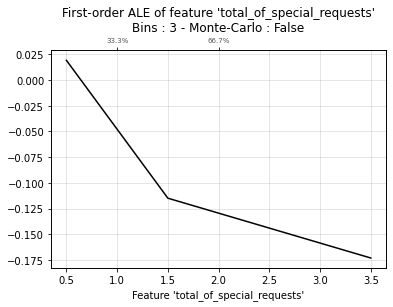

<AxesSubplot: title={'center': "First-order ALE of feature 'total_of_special_requests'\nBins : 3 - Monte-Carlo : False"}, xlabel="Feature 'total_of_special_requests'">

In [22]:
ale_plot(xgboost_retrain, ale_df,'total_of_special_requests', bins=20)

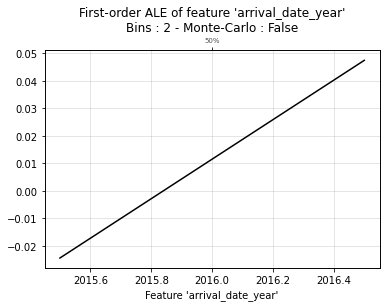

<AxesSubplot: title={'center': "First-order ALE of feature 'arrival_date_year'\nBins : 2 - Monte-Carlo : False"}, xlabel="Feature 'arrival_date_year'">

In [23]:
ale_plot(xgboost_retrain, ale_df,'arrival_date_year', bins=20)

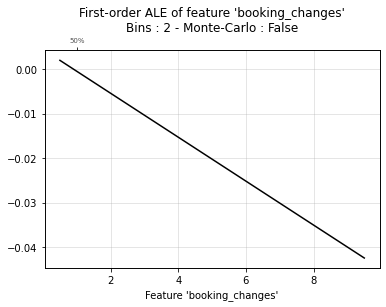

<AxesSubplot: title={'center': "First-order ALE of feature 'booking_changes'\nBins : 2 - Monte-Carlo : False"}, xlabel="Feature 'booking_changes'">

In [24]:
ale_plot(xgboost_retrain, ale_df,'booking_changes', bins=20)

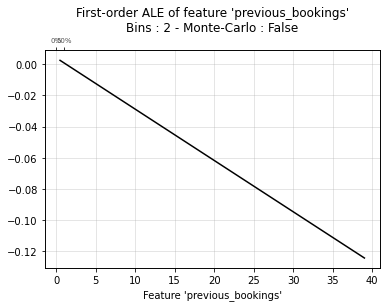

<AxesSubplot: title={'center': "First-order ALE of feature 'previous_bookings'\nBins : 2 - Monte-Carlo : False"}, xlabel="Feature 'previous_bookings'">

In [25]:
ale_plot(xgboost_retrain, ale_df,'previous_bookings', bins=20)

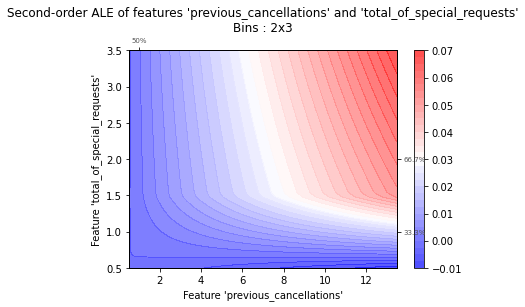

<AxesSubplot: title={'center': "Second-order ALE of features 'previous_cancellations' and 'total_of_special_requests'\nBins : 2x3"}, xlabel="Feature 'previous_cancellations'", ylabel="Feature 'total_of_special_requests'">

In [26]:
ale_plot(xgboost_retrain, ale_df,['previous_cancellations','total_of_special_requests'], bins=20)

In [ ]:
ale_plot(xgboost_retrain, ale_df,['previous_cancellations','total_of_special_requests'], bins=20)

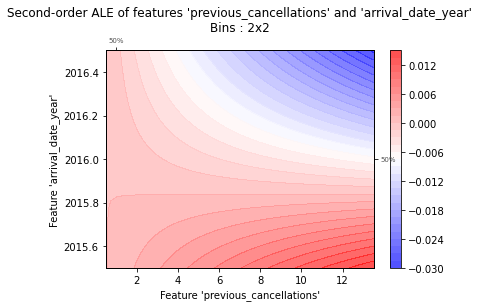

<AxesSubplot: title={'center': "Second-order ALE of features 'previous_cancellations' and 'arrival_date_year'\nBins : 2x2"}, xlabel="Feature 'previous_cancellations'", ylabel="Feature 'arrival_date_year'">

In [27]:
ale_plot(xgboost_retrain, ale_df,['previous_cancellations','arrival_date_year'], bins=20)

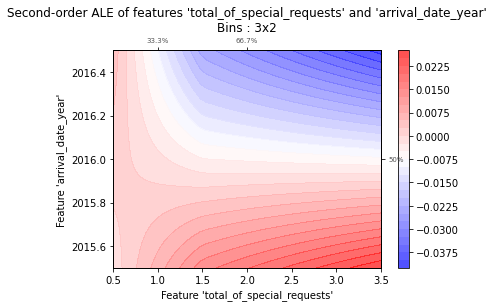

<AxesSubplot: title={'center': "Second-order ALE of features 'total_of_special_requests' and 'arrival_date_year'\nBins : 3x2"}, xlabel="Feature 'total_of_special_requests'", ylabel="Feature 'arrival_date_year'">

In [28]:
ale_plot(xgboost_retrain, ale_df,['total_of_special_requests','arrival_date_year'], bins=20)